## PHASE 3 PROJECT
## Dimension Data Customer Attrition Prediction 

## Business Understanding

 Dimension Data  is faced with a challenge in business applications, customer experience where there is a high Retention Loss rate with most of its customers abandoning their services and switching to their competitors.
 The company has identified this problem and is now seeking to build a classifier that will help them predict whether a customer will soon stop doing business with them. 
This will be done by proper analysis using their dataset to gain insights on what factors result in a high Attrition rate. A prediction model will be developed and this will provide insights and recommendations to the information & telecommunication company that will help them retain customers and avoid loss.


## Data Understanding

In [1]:
# Importing relevant libraries to be used.

# Data manipulation 
import pandas as pd 
import numpy as np 

# Data visualization
import seaborn as sns 
import matplotlib.pyplot as plt 



# Modeling
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV 
from sklearn.metrics import f1_score,recall_score,precision_score,confusion_matrix,roc_curve,roc_auc_score,classification_report # performance metrics
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

# Algorithms for supervised learning methods
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Filtering future warnings
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
#loading the dataset
BigQ_df = pd.read_csv('churn (1).csv')
#making a copy of the dataset
BigQ_df = BigQ_df.copy(deep = True)
#checking the first 5 rows
BigQ_df.head()


,customer_id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,932aff1e-186f-418c-8716-28bba167c384,NY,86,area_code_510,False,False,0,70.7,125,12.02,...,113,17.94,174.6,107,7.86,0.0,0,0.0,2,False
1,143a0b05-b95a-4d00-ad2a-9c1b18234c29,VT,165,area_code_510,False,False,0,242.9,126,41.29,...,65,17.83,228.4,126,10.28,0.0,0,0.0,1,False
2,45debf35-7e4d-42da-ba4e-d737a8997e16,KS,70,area_code_415,False,False,0,222.8,114,37.88,...,113,18.35,223.5,122,10.06,0.0,0,0.0,1,False
3,76b4b68f-1113-4411-88ad-de38b482e9fb,NM,158,area_code_408,False,False,0,172.4,114,29.31,...,69,21.81,235.3,104,10.59,0.0,0,0.0,2,False
4,6ee9cecd-1a09-4f4a-937e-aa848c392bed,ND,101,area_code_415,False,False,0,217.7,118,37.01,...,128,19.69,185.3,128,8.34,0.0,0,0.0,3,False


In [3]:

BigQ_df.shape

(4250, 21)

In [4]:
# Descriptive exploration

def columns_dtypes(df):
    print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns")
    print()
    num = len(df.select_dtypes(include=np.number).columns)
    cat = len(df.select_dtypes(include='object').columns)
    print(f"Numerical columns: {num}")
    print(f"Categorical columns: {cat}")
    print()
    print("These are the datatypes of column :")
    return df.dtypes

In [5]:
columns_dtypes(BigQ_df)

This dataset has 4250 rows and 21 columns

Numerical columns: 15
Categorical columns: 3

These are the datatypes of column :


customer_id                       object
state                             object
account_length                     int64
area_code                         object
international_plan                  bool
voice_mail_plan                     bool
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                               bool
dtype: object

In [6]:
BigQ_df.isnull().sum()

customer_id                      0
state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

In [7]:
BigQ_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 21 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer_id                    4250 non-null   object 
 1   state                          4250 non-null   object 
 2   account_length                 4250 non-null   int64  
 3   area_code                      4250 non-null   object 
 4   international_plan             4250 non-null   bool   
 5   voice_mail_plan                4250 non-null   bool   
 6   number_vmail_messages          4250 non-null   int64  
 7   total_day_minutes              4250 non-null   float64
 8   total_day_calls                4250 non-null   int64  
 9   total_day_charge               4250 non-null   float64
 10  total_eve_minutes              4250 non-null   float64
 11  total_eve_calls                4250 non-null   int64  
 12  total_eve_charge               4250 non-null   f

In [8]:
BigQ_df.describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [9]:
# The 'select_dtypes' method is used to filter columns with numerical data types ('number' includes int, float, etc)
# Numerical Columns
print(f"Numerical Columns: {BigQ_df.select_dtypes(include='number').columns}\n")
()

# The 'select__dtypes' method is used to filter columns with object data types (typically used for strings and categorical data)
# Categorical Columns
print(f"Categorical Columns: {BigQ_df.select_dtypes(include='object').columns}")

Numerical Columns: Index(['account_length', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls'],
      dtype='object')

Categorical Columns: Index(['customer_id', 'state', 'area_code'], dtype='object')


## Data Preparation

## Data cleaning
Identifying and correcting inaccuracies, inconsistencies, and irrelevant data from a dataset. These were the steps. We looked into handling missing values,removing duplicates,correcting the data format and transforming variables to make the data ready for modelling and predictions.


In [10]:
def check_duplicates_missing(dataframe):
    # calculate percentage of missing values
    percent_missing = dataframe.isnull().mean().round(4) * 100
    count_missing = dataframe.isnull().sum()
    # calculate percentage of duplicate rows
    percent_duplicates = dataframe.duplicated().mean() * 100
    # creating a result dataframe
    result = pd.DataFrame({'Missing Values %': percent_missing, 
                           'Missing Values Count': count_missing, 
                           'Duplicate Values %': percent_duplicates})
    # find column with most missing values
    if percent_missing.max() > 0:
        column_most_missing = percent_missing.idxmax()
        print(f"{(column_most_missing).capitalize()} is the column with most null count.")
        print()
    else:
        print("No column with missing values")
    if percent_duplicates.max() > 0:
        column_most_duplicates = percent_duplicates.idxmax()
        print("Column with most duplicates:",column_most_duplicates)
    else:
        print("No duplicates")
    return result

In [11]:
check_duplicates_missing(BigQ_df)

No column with missing values
No duplicates


,Missing Values %,Missing Values Count,Duplicate Values %
customer_id,0.0,0,0.0
state,0.0,0,0.0
account_length,0.0,0,0.0
area_code,0.0,0,0.0
international_plan,0.0,0,0.0
voice_mail_plan,0.0,0,0.0
number_vmail_messages,0.0,0,0.0
total_day_minutes,0.0,0,0.0
total_day_calls,0.0,0,0.0
total_day_charge,0.0,0,0.0


In [12]:
#checking for unique for unique data in the dataset
BigQ_df.nunique()

customer_id                      4250
state                              51
account_length                    215
area_code                           3
international_plan                  2
voice_mail_plan                     2
number_vmail_messages              46
total_day_minutes                1843
total_day_calls                   120
total_day_charge                 1843
total_eve_minutes                1773
total_eve_calls                   123
total_eve_charge                 1572
total_night_minutes              1757
total_night_calls                 128
total_night_charge                992
total_intl_minutes                168
total_intl_calls                   21
total_intl_charge                 168
number_customer_service_calls      10
churn                               2
dtype: int64

In [13]:
# printing the unique values of the categorical variables
print(BigQ_df['area_code'].unique())
print(BigQ_df['customer_id'].unique())

['area_code_510' 'area_code_415' 'area_code_408']
['932aff1e-186f-418c-8716-28bba167c384'
 '143a0b05-b95a-4d00-ad2a-9c1b18234c29'
 '45debf35-7e4d-42da-ba4e-d737a8997e16' ...
 'b2287275-f563-40ae-ad9c-06844ca539f4'
 '9908263a-a9c9-48f5-9c26-ca7cc9bd5917'
 'ab236f86-ad9b-461e-9193-3176d3925a1f']


In [14]:
# Checking value_count of churn(target variable) column
BigQ_df['churn'].value_counts()

churn
False    3652
True      598
Name: count, dtype: int64

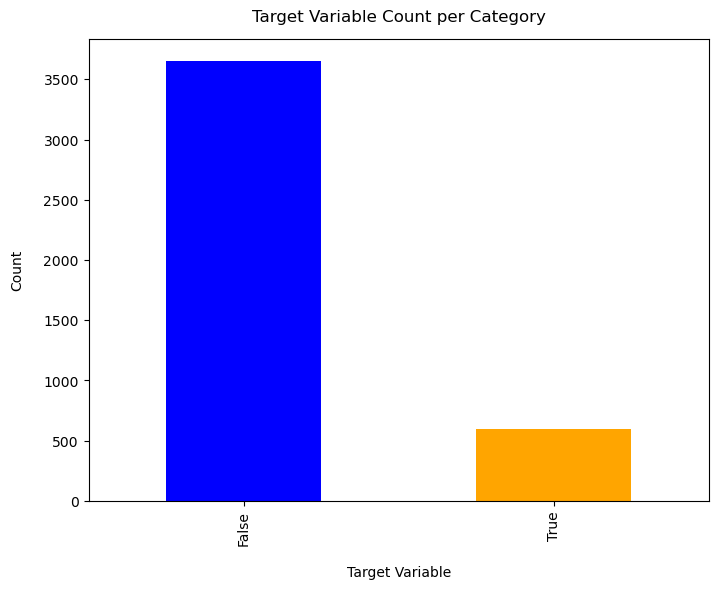

In [15]:
# overview of the target variable
churn_counts = BigQ_df['churn'].value_counts()

plt.figure(figsize=(8, 6))
churn_counts.plot(kind='bar', color=['blue', 'orange'])
plt.xlabel("Target Variable", labelpad=14)
plt.ylabel("Count", labelpad=14)
plt.title("Target Variable Count per Category", y=1.02)
plt.show()



In [16]:
#checking for the percentage rate of the churn
percentage_churn = 100 * BigQ_df['churn'].value_counts() / len(BigQ_df['churn'])
percentage_churn

churn
False    85.929412
True     14.070588
Name: count, dtype: float64

## Explaratory Data Analysis

In [17]:
BigQ_df=BigQ_df.drop(['customer_id', 'state'],axis=1)

In [18]:
def categorical_visualization(col):
    plt.subplot(1,2,1)
    sns.countplot(x=col,data=BigQ_df)
    plt.subplot(1,2,2)
    BigQ_df[col].value_counts().plot(kind='pie',autopct='%0.2f%%')
    plt.tight_layout()
    plt.show()

In [19]:
def numerical_visualization(col):
    plt.subplot(1,2,1)
    sns.kdeplot(x=col,data=BigQ_df)
    plt.grid()
    plt.subplot(1,2,2)
    sns.boxplot(x=col,data=BigQ_df)
    plt.tight_layout()
    plt.show()

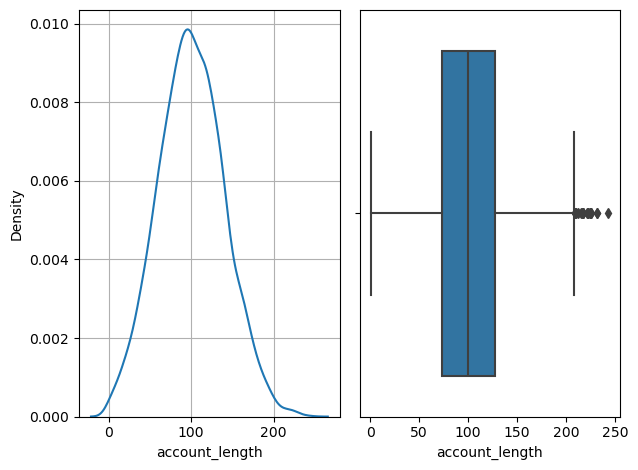

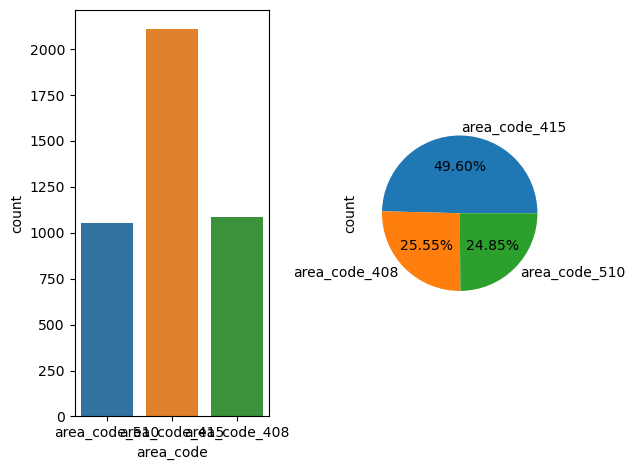

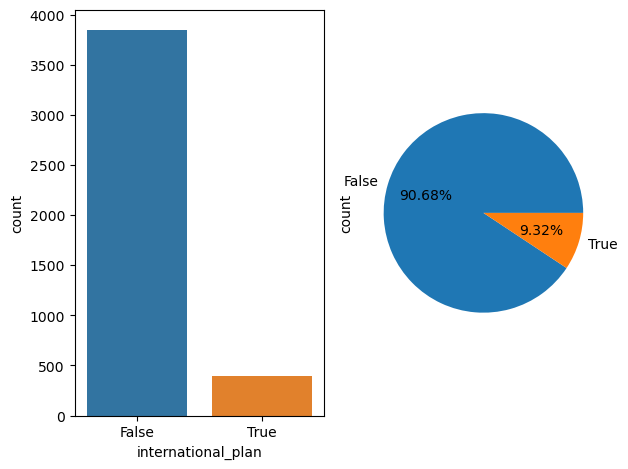

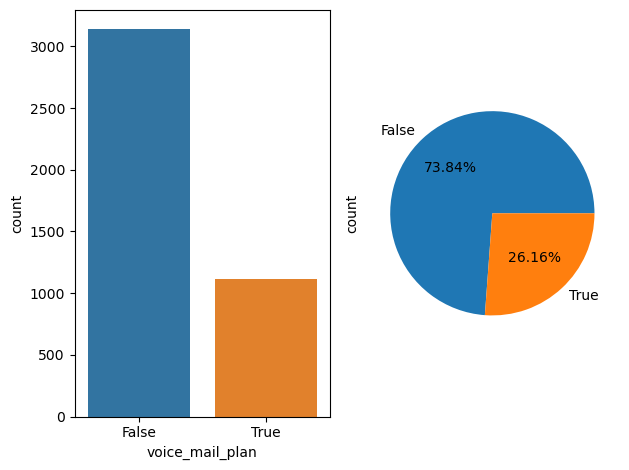

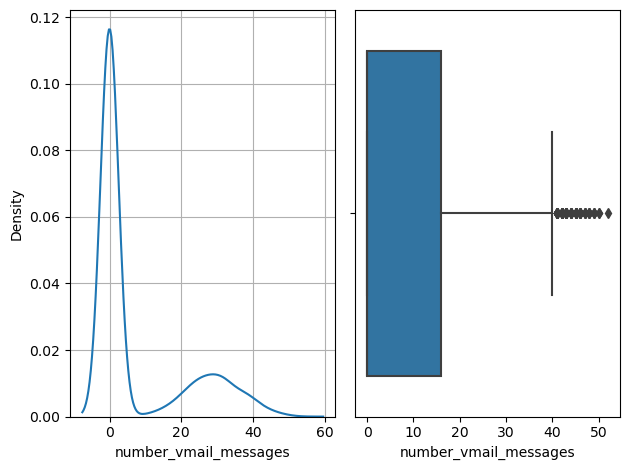

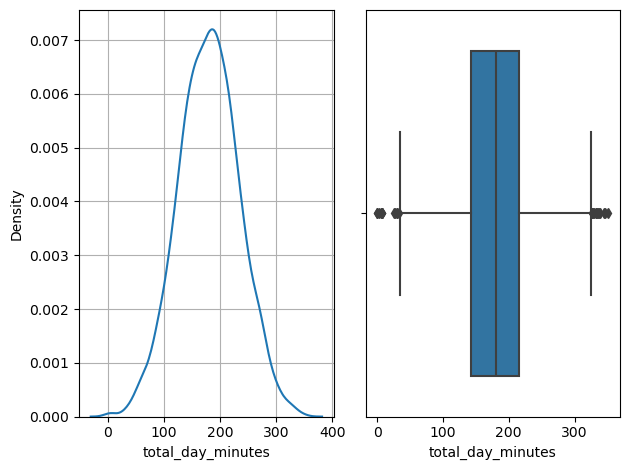

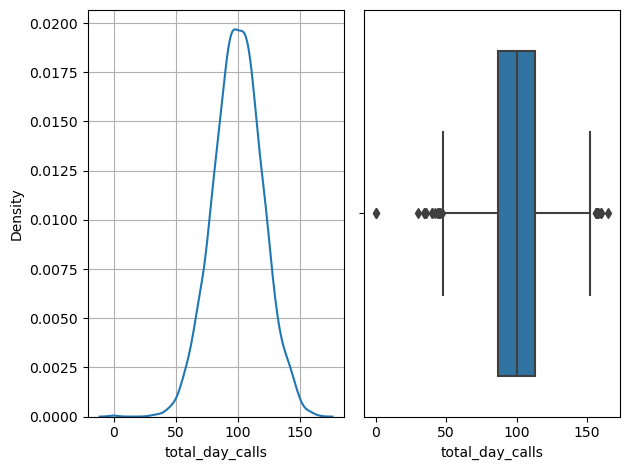

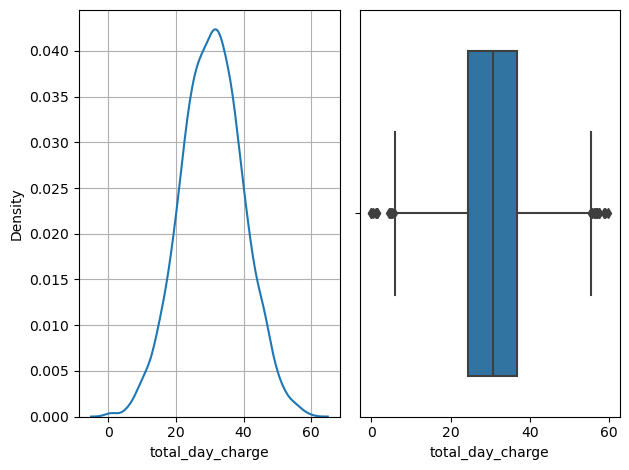

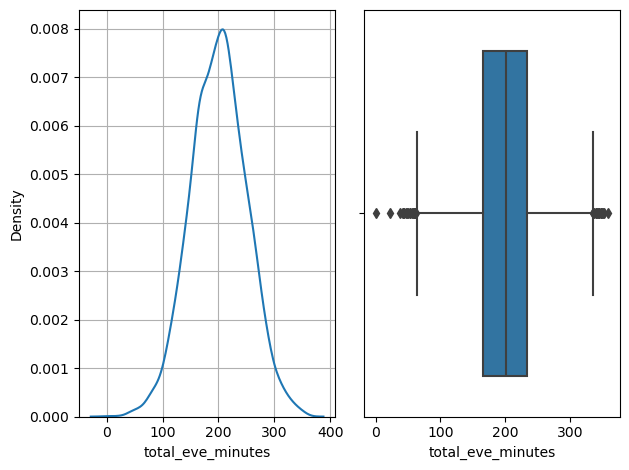

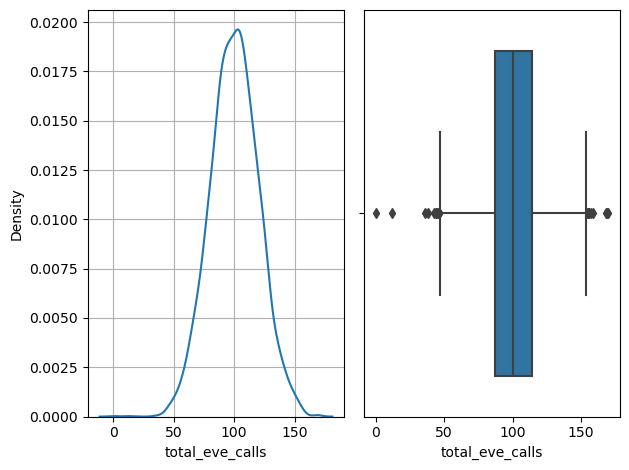

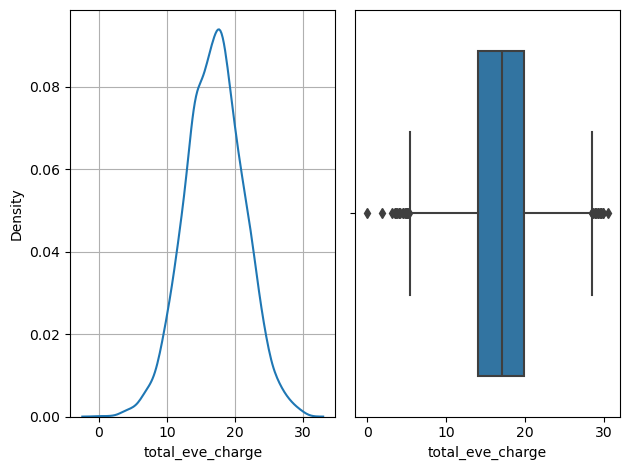

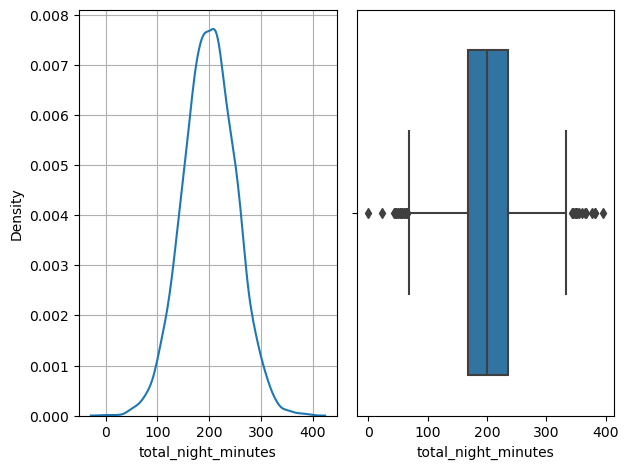

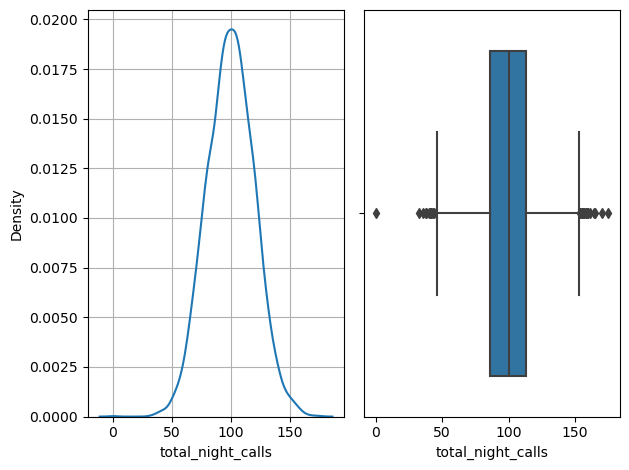

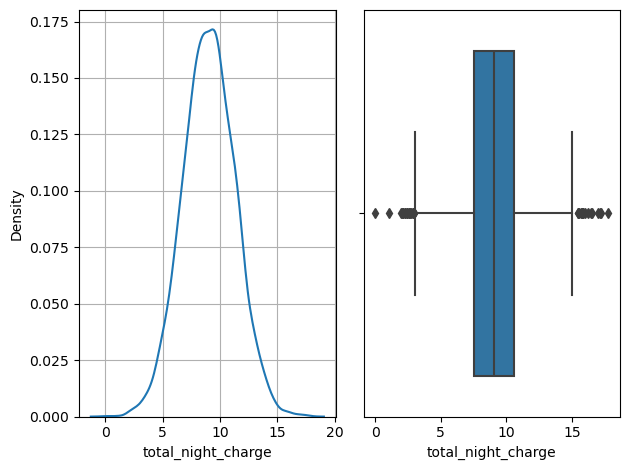

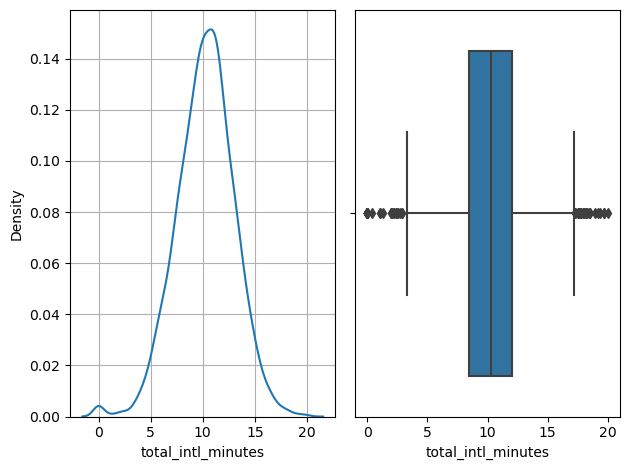

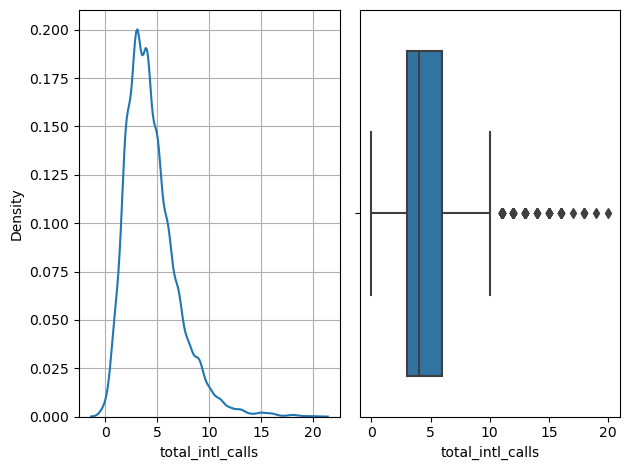

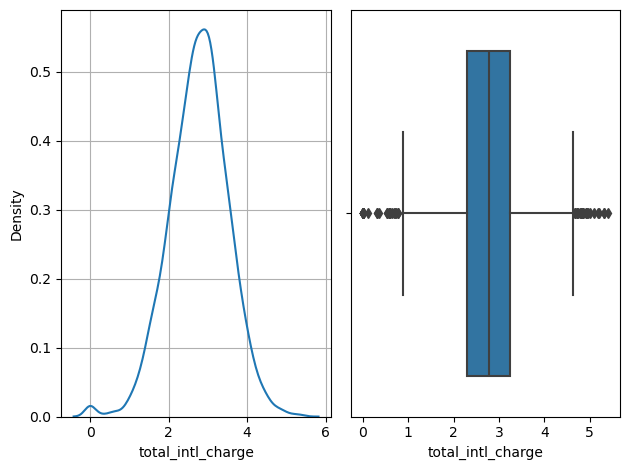

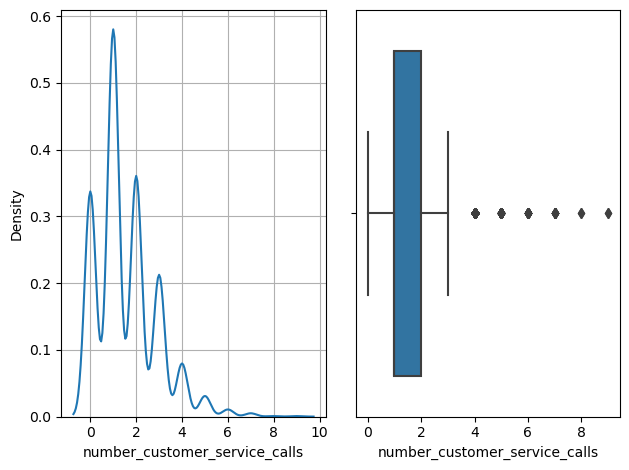

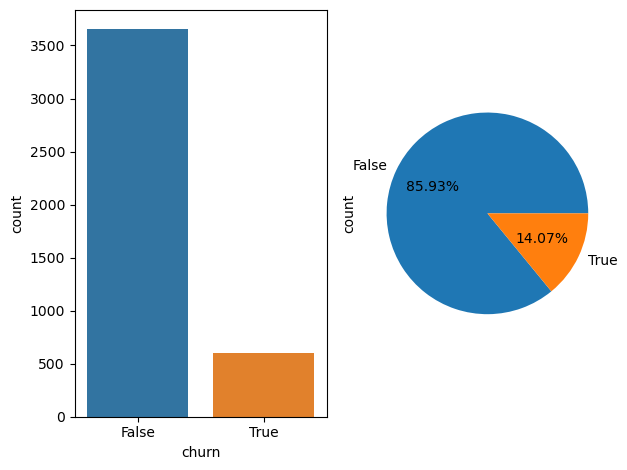

In [20]:
for i in BigQ_df.columns:
    if BigQ_df[i].dtype=='object':
        categorical_visualization(i)
    elif BigQ_df[i].dtype=='bool':
        categorical_visualization(i)
    else:
        numerical_visualization(i)

In [21]:
BigQ_df.select_dtypes(exclude=['object','bool']).std()

account_length                   39.698401
number_vmail_messages            13.439882
total_day_minutes                54.012373
total_day_calls                  19.850817
total_day_charge                  9.182096
total_eve_minutes                50.249518
total_eve_calls                  19.908591
total_eve_charge                  4.271212
total_night_minutes              50.353548
total_night_calls                20.093220
total_night_charge                2.265922
total_intl_minutes                2.760102
total_intl_calls                  2.463069
total_intl_charge                 0.745204
number_customer_service_calls     1.311434
dtype: float64

In [22]:
BigQ_df.head(10)

,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
0,86,area_code_510,False,False,0,70.7,125,12.02,211.0,113,17.94,174.6,107,7.86,0.0,0,0.0,2,False
1,165,area_code_510,False,False,0,242.9,126,41.29,209.8,65,17.83,228.4,126,10.28,0.0,0,0.0,1,False
2,70,area_code_415,False,False,0,222.8,114,37.88,215.9,113,18.35,223.5,122,10.06,0.0,0,0.0,1,False
3,158,area_code_408,False,False,0,172.4,114,29.31,256.6,69,21.81,235.3,104,10.59,0.0,0,0.0,2,False
4,101,area_code_415,False,False,0,217.7,118,37.01,231.7,128,19.69,185.3,128,8.34,0.0,0,0.0,3,False
5,114,area_code_415,False,False,0,191.5,88,32.56,175.2,78,14.89,220.3,118,9.91,0.0,0,0.0,0,False
6,84,area_code_415,False,False,0,204.1,132,34.70,164.4,117,13.97,165.1,123,7.43,0.0,0,0.0,1,False
7,44,area_code_408,False,False,0,207.2,90,35.22,178.6,76,15.18,182.0,74,8.19,0.0,0,0.0,0,False
8,115,area_code_415,False,False,0,132.0,90,22.44,197.5,75,16.79,175.8,114,7.91,0.0,0,0.0,3,False
9,78,area_code_510,False,False,0,131.6,102,22.37,290.4,134,24.68,190.5,95,8.57,0.0,0,0.0,3,False


In [23]:
BigQ_df['area_code'].value_counts()

area_code
area_code_415    2108
area_code_408    1086
area_code_510    1056
Name: count, dtype: int64

## Modeling

The dataset we are working on is an example of a binary classification problem  which predicts customer loss (whether a customer will drop off or not). This will  use a basic logistic regression model.

To accomplish the outlined objectives specified in the project proposal, we plan to leverage a combination of diverse machine learning algorithms. The selected algorithms, each offering unique advantages, are tailored to address specific aspects of the project requirements. The following algorithms will be employed:
1. Logistic Regression
2. Decision Tree
3. Random Forest

In the assessment of our model performances, the ROC_AUC metric will be employed as a key evaluation measure. The ROC_AUC  is a comprehensive metric particularly well-suited for binary classification problems. It considers both sensitivity and specificity across various threshold levels, providing a robust indication of a model's ability to discriminate between classes.



In [24]:
#pliting
#Features
X = BigQ_df.drop('churn', axis=1)  
#Target variable
y = BigQ_df['churn'] 


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train-Test Split
Splitting data into train and test sets using a test_size of 0.2and a random_state 42

## Feature Engineering.


replacing missing values

In [26]:
BigQ_df['area_code'] = pd.factorize(BigQ_df['area_code'])[0]



convert to 0:1

In [27]:
#for i in BigQ_df.select_dtypes(include='bool').columns:
    #BigQ_df[i]=BigQ_df[i].replace({True:1,False:0})

In [28]:
df_encoded = pd.get_dummies(BigQ_df, columns=['area_code'],dtype=int)

In [29]:
df_encoded = df_encoded.astype(float)

In [30]:

X_train = pd.get_dummies(X_train, columns=['area_code'], dtype=int)
X_test = pd.get_dummies(X_test, columns=['area_code'], dtype=int)


In [31]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


## Logistic Regression

In [32]:
logreg = LogisticRegression()

In [33]:
# Fit the model on the training data 
logreg.fit(X_train, y_train)

#predict on the labels of test set
y_pred_log = logreg.predict(X_test)

In [34]:
def plot_confusion_matrix(y_true, y_pred, classes):
    """
    Plots a confusion matrix.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

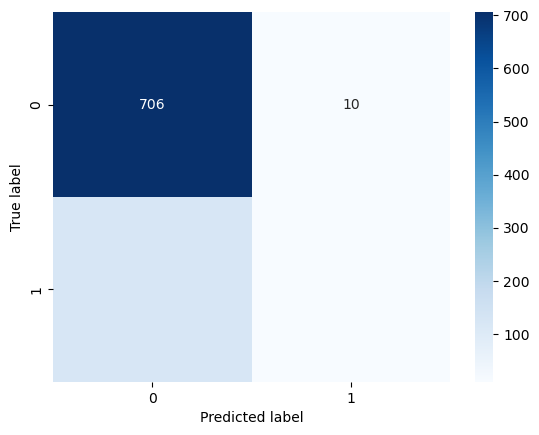

In [35]:
plot_confusion_matrix(y_test, y_pred_log, [0,1])

In [36]:
print(classification_report(y_test,y_pred_log))

              precision    recall  f1-score   support

       False       0.85      0.99      0.91       716
        True       0.52      0.08      0.14       134

    accuracy                           0.84       850
   macro avg       0.69      0.53      0.53       850
weighted avg       0.80      0.84      0.79       850



In [37]:

from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=123)

# Fit and transform the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


In [38]:
from imblearn.under_sampling import RandomUnderSampler

# Initialize RandomUnderSampler
undersampler = RandomUnderSampler(random_state=123)

# Fit and transform the training data
X_resampled, y_resampled = undersampler.fit_resample(X_train, y_train)


In [39]:
from imblearn.combine import SMOTEENN

# Initialize SMOTEENN
smote_enn = SMOTEENN(random_state=123)

# Fit and transform the training data
X_resampled, y_resampled = smote_enn.fit_resample(X_train, y_train)


In [40]:
from sklearn.linear_model import LogisticRegression

# Initialize LogisticRegression with class weights
model = LogisticRegression(class_weight='balanced', random_state=123)

# Fit the model
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', random_state=123)

In [41]:
print(BigQ_df.dtypes)


account_length                     int64
area_code                          int64
international_plan                  bool
voice_mail_plan                     bool
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
churn                               bool
dtype: object


In [42]:
BigQ_df = BigQ_df.select_dtypes(include=['number'])

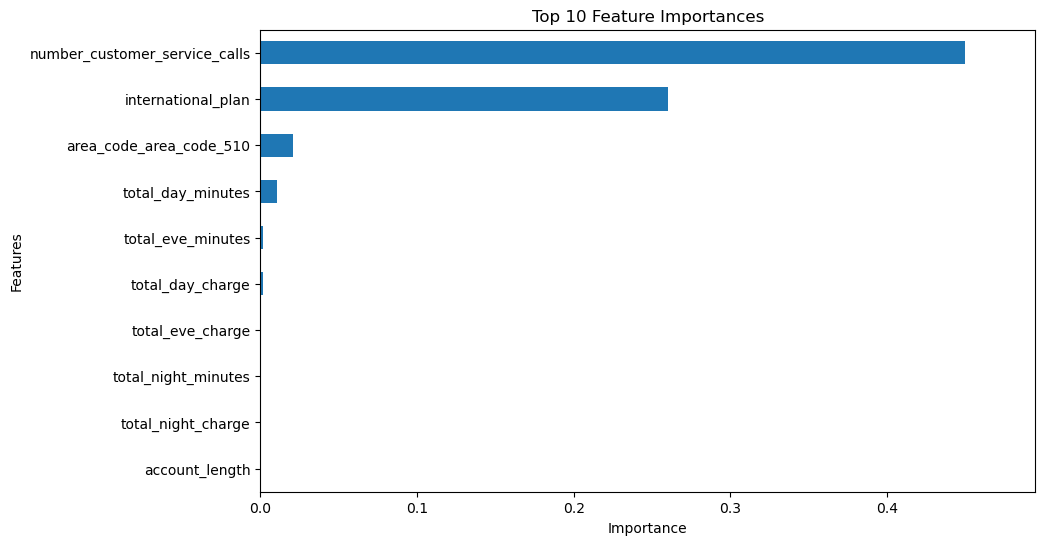

In [43]:
# Feature Importances
importance = logreg.coef_[0]
feature_names = X_train.columns
feature_importances = pd.Series(importance,index=feature_names)
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
# Select the top 10 features
top_features = feature_importances[:10]  
top_features.sort_values().plot(kind='barh')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Top 10 Feature Importances')
# Set the xlim to the maximum importance value
plt.xlim(0, max(top_features)* 1.1)  
plt.show()


 The confusion matrix reveals a strong presence of true positives and true negatives, indicating reliable and balanced predictions that avoid overfitting.

Feature importance analysis highlights total day charge, number customer service calls, and international plan as the top three influential factors. These insights emphasize the significance of  customer interactions in predicting outcomes, offering valuable guidance for refining the model or shaping future strategies.

## Decision Tree Classifier

In [44]:
#Instantiate DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=42)

In [45]:
#Fit on the training data
dt_clf.fit(X_train,y_train)

#predict on the test set
y_pred_dt = dt_clf.predict(X_test)

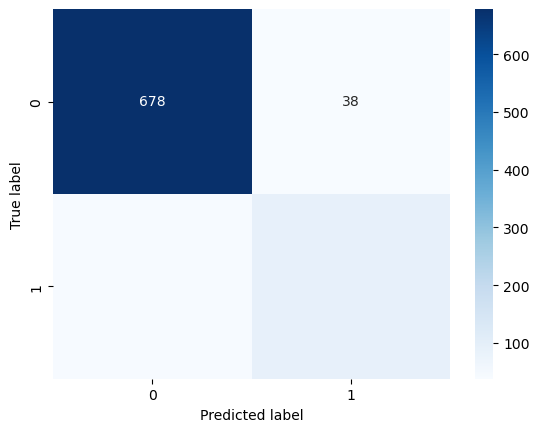

In [46]:
plot_confusion_matrix(y_test, y_pred_dt, [0,1])

In [47]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

       False       0.94      0.95      0.94       716
        True       0.71      0.69      0.70       134

    accuracy                           0.91       850
   macro avg       0.82      0.82      0.82       850
weighted avg       0.90      0.91      0.91       850




Upon examination of the confusion matrix, it becomes evident that the decision tree model exhibits a notable prevalence of true positives and true negatives over false positives and false negatives. This observation suggests that the model is consistently making accurate predictions, showcasing a balanced performance that avoids overfitting. The emphasis on true positives and true negatives signifies the model's reliability in correctly classifying both positive and negative instances.

.This insight into feature importance provides valuable context for understanding the factors driving the model's decision-making process and highlights areas of focus for further investigation or model refinement.







## Random Forest Classifier

In [48]:
#Instantiate the classifier
rf_clf= RandomForestClassifier(random_state=123)

#Fit on the training data
rf_clf.fit(X_train,y_train)

RandomForestClassifier(random_state=123)

In [49]:
#predict on the test data
y_pred_rf = rf_clf.predict(X_test)

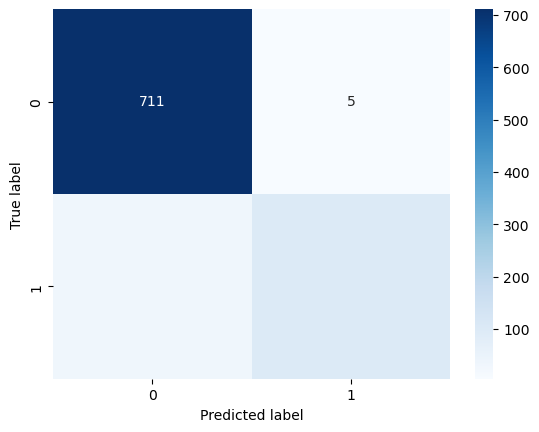

In [50]:
plot_confusion_matrix(y_test, y_pred_rf, [0,1])

In [51]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

       False       0.95      0.99      0.97       716
        True       0.95      0.74      0.83       134

    accuracy                           0.95       850
   macro avg       0.95      0.87      0.90       850
weighted avg       0.95      0.95      0.95       850



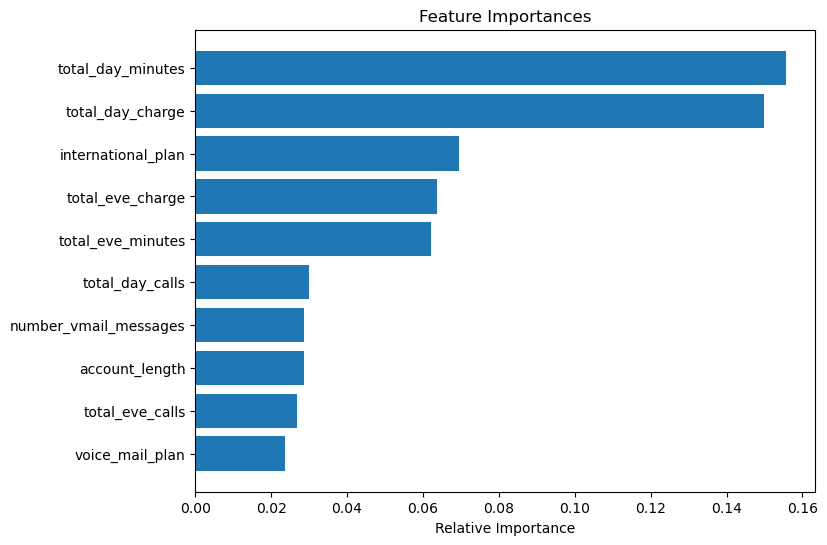

In [52]:
feature_names = list(X_train.columns)
importances = rf_clf.feature_importances_[0:10]
indices = np.argsort(importances)

plt.figure(figsize=(8,6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

The random forest classifier model exhibits an improved recall score of 0.73, showcasing a notable enhancement over its predecessor. This implies that the model accurately identifies approximately 73% of the actual positive instances.

Upon evaluation through the confusion matrix, it becomes evident that the model achieves a higher count of true positives and true negatives in comparison to false positives and false negatives. This suggests a robust performance, emphasizing the model's ability to make correct predictions more frequently than incorrect ones, indicative of its avoidance of overfitting.

As per the model's analysis, the top three most influential features are identified as total day charge, total international calls, and total evening charge.

5. Model Evaluation

In [53]:
np.random.seed(123)

# Assuming resampled_X_train, resampled_y_train, X1_test, and y_test are defined earlier

classifiers = [LogisticRegression(), RandomForestClassifier(), DecisionTreeClassifier()]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'recall'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    recall = recall_score(y_test, y_pred)
    
    # Use pd.concat to concatenate the DataFrame
    result_table = pd.concat([result_table, pd.DataFrame({'classifiers': [cls.__class__.__name__], 'recall': [recall]})], ignore_index=True)

# Set the name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

print(result_table)

                          recall
classifiers                     
LogisticRegression      0.082090
RandomForestClassifier  0.738806
DecisionTreeClassifier  0.701493


The results table shows that  RandomForestClassifier has the highest score followed by The DecisionTreeClassifier and LogisticRegression  has the average recall score 

Models Comparison - ROC Curve

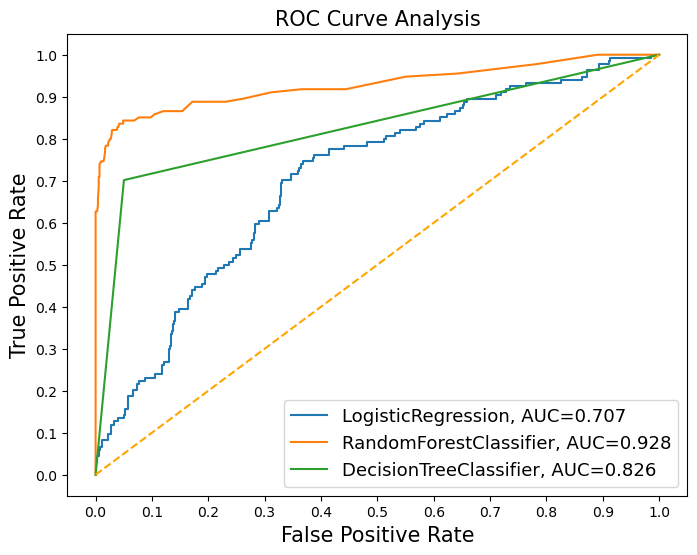

In [54]:
# Set a seed for reproducibility
np.random.seed(123)

classifiers = [LogisticRegression(),
               RandomForestClassifier(),
               DecisionTreeClassifier()]

# Define lists to store results
classifiers_list = []
fpr_list = []
tpr_list = []
auc_list = []

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::, 1]

    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)

    # Store results in lists
    classifiers_list.append(cls.__class__.__name__)
    fpr_list.append(fpr)
    tpr_list.append(tpr)
    auc_list.append(auc)

# Create a DataFrame from the lists
result_table = pd.DataFrame({
    'classifiers': classifiers_list,
    'fpr': fpr_list,
    'tpr': tpr_list,
    'auc': auc_list
})

# Set the name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

# Plot ROC Curve
fig = plt.figure(figsize=(8, 6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'], label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')

plt.show()

The analysis of ROC curves reveals distinct performance levels among the classifiers, with RandomForestClassifier exhibiting the most robust performance, followed by DecisionTreeClassifier and LogisticRegression, in descending order. Notably, the RandomForestClassifier achieves the highest AUC score of 0.913, signifying superior discrimination between positive and negative instances. On the contrary, the LogisticRegression model attains the lowest AUC score at 0.707.

The ROC curve is a graphical representation illustrating the balance between the true positive rate (TPR) and the false positive rate (FPR) for a binary classifier. TPR reflects the accuracy of positive instance predictions, while FPR indicates the rate of misclassification for negative instances. The AUC, representing the area under the ROC curve, serves as a comprehensive metric for assessing classifier performance.

A heightened AUC score indicates an enhanced ability of the classifier to effectively differentiate between positive and negative instances. In this context, the superior AUC score of the RandomForestClassifier underscores its proficiency in making accurate predictions, thereby solidifying its position as the top-performing classifier in the analyzed set.







##  Model Tuning

In [55]:
# Define a smaller hyperparameter grid
param_grid = {
    "max_depth": [8, 15],
    "n_estimators": [500],
    "min_samples_split": [5, 10],
    "criterion": ['entropy', 'gini']
}

# Create an instance of the RandomForest classifier
rf = RandomForestClassifier(random_state=123)

# Create GridSearchCV object with the defined parameter grid and scoring metric
grid_search = GridSearchCV(rf, param_grid, cv=2, n_jobs=-1, verbose=1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train,y_train)

# Print the best parameters
print("Best parameters:", grid_search.best_params_)

Fitting 2 folds for each of 8 candidates, totalling 16 fits
Best parameters: {'criterion': 'gini', 'max_depth': 15, 'min_samples_split': 5, 'n_estimators': 500}


In [56]:
# Create an instance of the RandomForest classifier with best params
rf_tuned = RandomForestClassifier(criterion = 'entropy',
                                  max_depth = 15,
                                  min_samples_split = 5,
                                  n_estimators = 500,
                                  random_state=123)
#Fit the model on the training data
rf_tuned.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, min_samples_split=5,
                       n_estimators=500, random_state=123)

In [57]:
#Predict on the test data
y_pred_tuned = rf_tuned.predict(X_test)

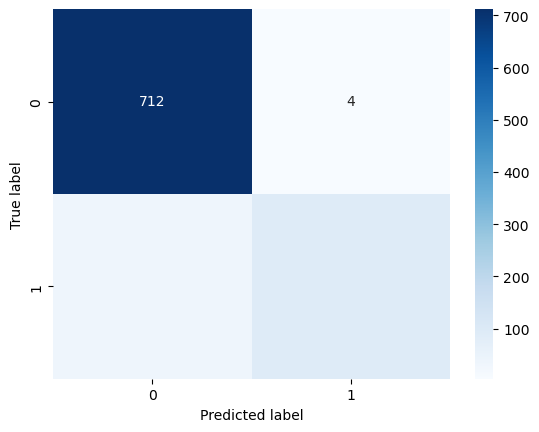

In [58]:
#The confusion matrix
plot_confusion_matrix(y_test, y_pred_tuned, [0,1])

In [59]:
#print the classification report
print(classification_report(y_test,y_pred_tuned))

              precision    recall  f1-score   support

       False       0.95      0.99      0.97       716
        True       0.96      0.71      0.82       134

    accuracy                           0.95       850
   macro avg       0.95      0.85      0.89       850
weighted avg       0.95      0.95      0.95       850



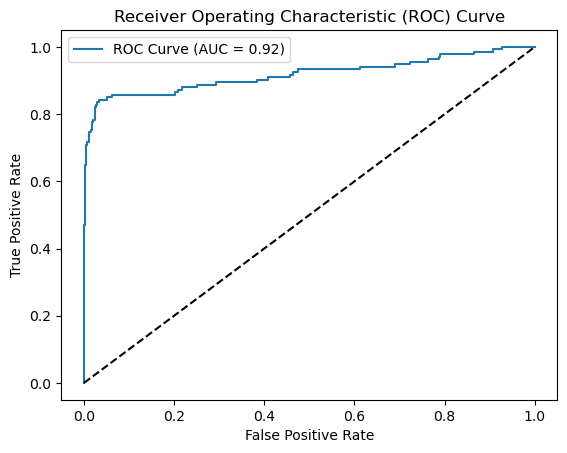

In [60]:
# Get the predicted probabilities for the positive class
y_proba = rf_tuned.predict_proba(X_test)[:, 1]

# Compute the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC Curve (AUC = {:.2f})'.format(auc_score))
# Diagonal line for random classifier
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

The tuned Random Forest model demonstrates strong performance in discerning between positive (churned) and negative (non-churned) customer classes, particularly in accurately identifying churned customers. The model achieves a recall score of 0.73, indicating its ability to correctly capture 73% of the actual churned customers.

## Recommendation

To address higher churn rates, it is recommended to implement targeted promotional strategies, such as offering exclusive discounts to customers in specific regions. Improving customer service by enhancing training programs for representatives is also proposed to boost satisfaction and reduce churn. Additionally, reviewing the pricing structure for various charges and introducing discounted packages can make offerings more competitive. Lastly, enhancing the voicemail plan's value through new features or discounts aims to increase customer adoption and retention.




